## Question 3 - ML Assignment 1

### Part A - Visualising the Dataset
- Importing Libraries and Open the Dataset using Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

In [2]:
# Read the data
df = pd.read_csv("/Users/arnav/Desktop/MachineLearning/ML_CSE343_Assignments/2021519_HW1/2021519_Q3/CO2_Emissions.csv")

# Convert the data to a feature matrix and target vector
feature_matrix = df.iloc[:, 0:11].values
target_vector = df.iloc[:, -1].values
df.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Make a matrix of non-categorical features
non_categorical_feature_matrix = feature_matrix[:, [3, 4, 7, 8, 9, 10]]

# Make a matrix of categorical features
categorical_feature_matrix = feature_matrix[:, [0, 1, 2, 5, 6]]

- We first visualise non-categorical features using scatter plots, box plots, pair plots and correlation heatmap

##### Non-Categorical Features

- <b> Scatter-Plots </b>

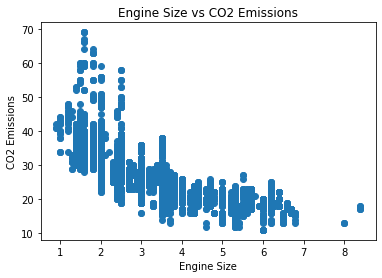

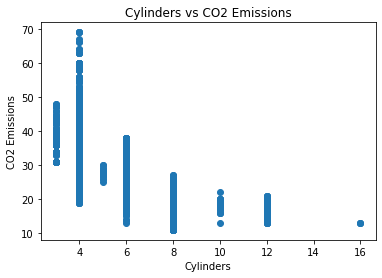

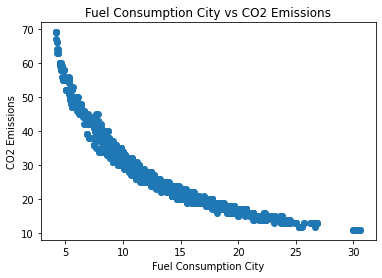

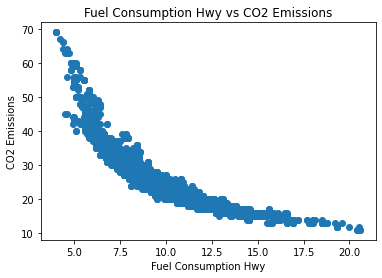

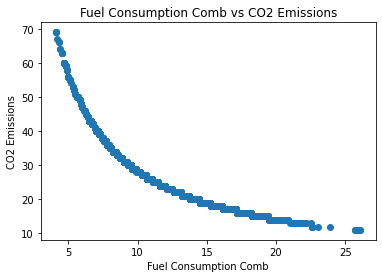

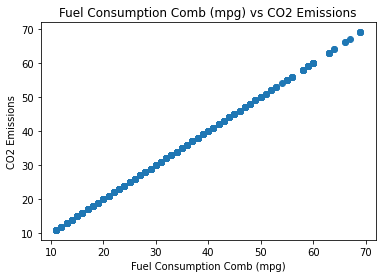

In [4]:
# Prepare a scatter plot for non-categorical features using matplotlib
df_non_categorical_feature_matrix = pd.DataFrame(non_categorical_feature_matrix)
# Engine Size vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 0], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Engine Size vs CO2 Emissions")
plt.show()

# Cylinders vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 1], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emissions")
plt.title("Cylinders vs CO2 Emissions")
plt.show()

# Fuel Consumption City vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 2], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Fuel Consumption City")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption City vs CO2 Emissions")
plt.show()

# Fuel Consumption Hwy vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 3], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Fuel Consumption Hwy")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption Hwy vs CO2 Emissions")
plt.show()

# Fuel Consumption Comb vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 4], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Fuel Consumption Comb")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption Comb vs CO2 Emissions")
plt.show()

# Fuel Consumption Comb (mpg) vs CO2 Emissions
plt.scatter(df_non_categorical_feature_matrix.iloc[:, 5], df_non_categorical_feature_matrix.iloc[:, -1])
plt.xlabel("Fuel Consumption Comb (mpg)")
plt.ylabel("CO2 Emissions")
plt.title("Fuel Consumption Comb (mpg) vs CO2 Emissions")
plt.show()


- <b>Pair Plots </b>

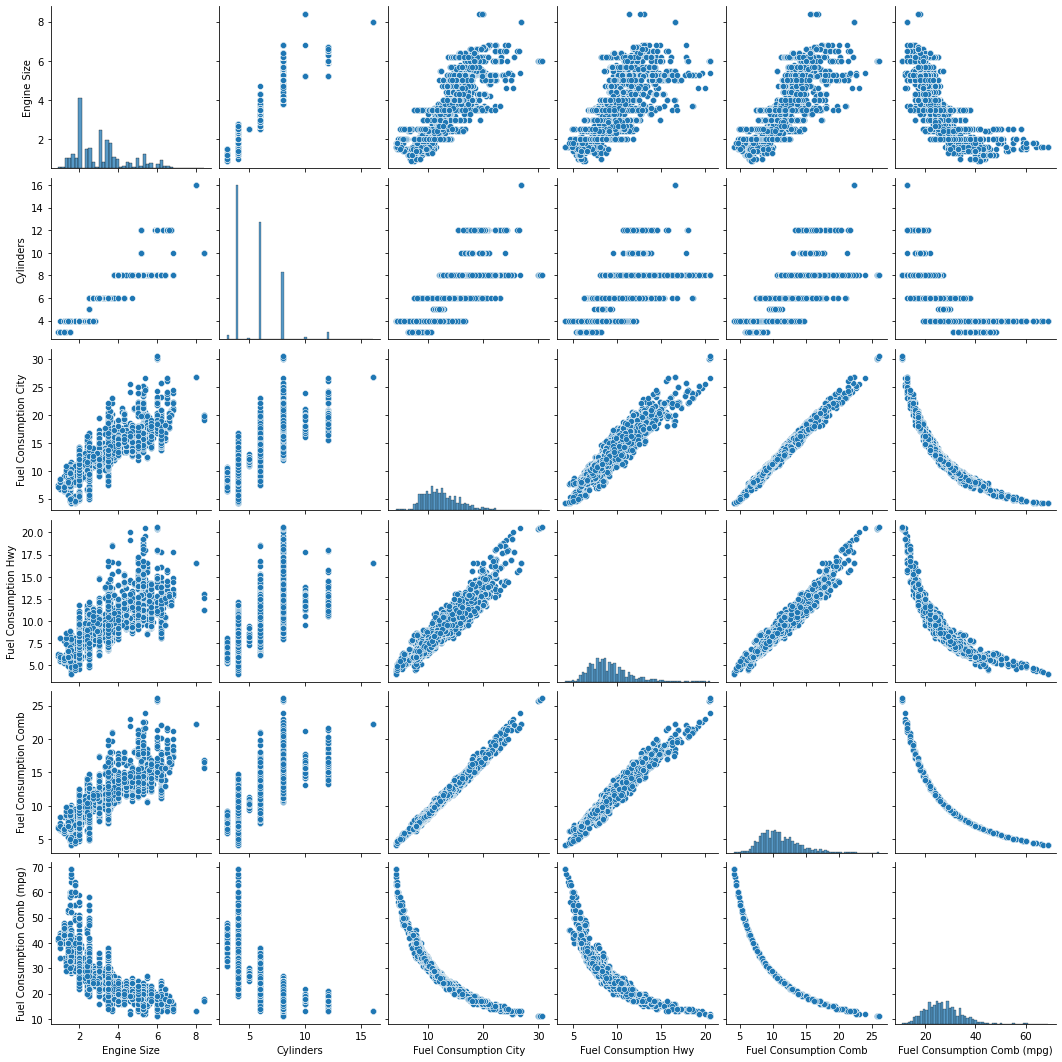

In [5]:
# Plot pair plots for non-categorical features using seaborn
df_non_categorical_feature_matrix = pd.DataFrame(non_categorical_feature_matrix, columns=["Engine Size", "Cylinders", "Fuel Consumption City", "Fuel Consumption Hwy", "Fuel Consumption Comb", "Fuel Consumption Comb (mpg)"])
sns.pairplot(df_non_categorical_feature_matrix)
plt.show()

- <b>Box Plot</b>

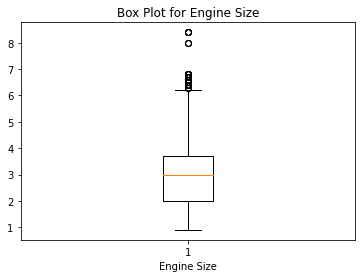

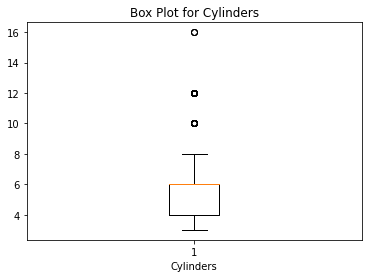

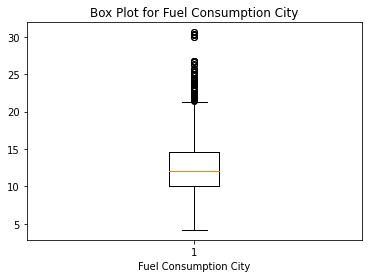

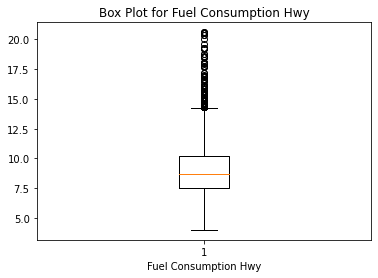

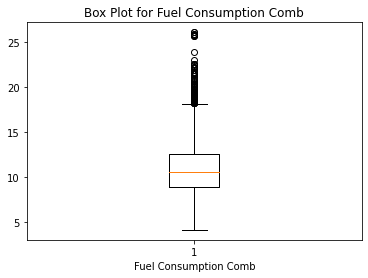

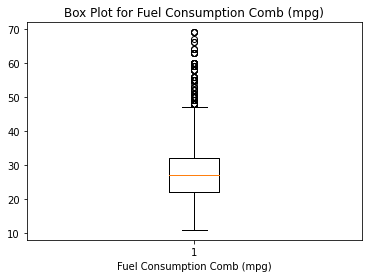

In [6]:
# Prepare a box plot for the non-categorical features using matplotlib

# Engine Size
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 0])
plt.xlabel("Engine Size")
plt.title("Box Plot for Engine Size")
plt.show()

# Cylinders
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 1])
plt.xlabel("Cylinders")
plt.title("Box Plot for Cylinders")
plt.show()

# Fuel Consumption City
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 2])
plt.xlabel("Fuel Consumption City")
plt.title("Box Plot for Fuel Consumption City")
plt.show()

# Fuel Consumption Hwy
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 3])
plt.xlabel("Fuel Consumption Hwy")
plt.title("Box Plot for Fuel Consumption Hwy")
plt.show()

# Fuel Consumption Comb
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 4])
plt.xlabel("Fuel Consumption Comb")
plt.title("Box Plot for Fuel Consumption Comb")
plt.show()

# Fuel Consumption Comb (mpg)
plt.boxplot(df_non_categorical_feature_matrix.iloc[:, 5])
plt.xlabel("Fuel Consumption Comb (mpg)")
plt.title("Box Plot for Fuel Consumption Comb (mpg)")
plt.show()


- <b>Heatmap</b>

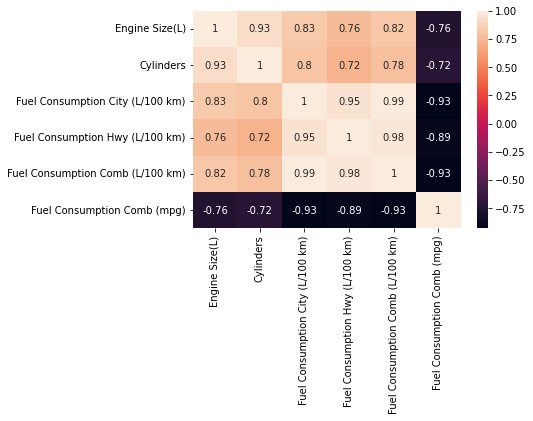

In [7]:
df_copy = df.copy()
df_copy.drop(columns=["CO2 Emissions(g/km)"], inplace=True)

corr = df_copy.corr()

# Plot a heatmap for the correlation matrix using seaborn
sns.heatmap(corr, annot=True)
plt.show()

##### Categorical Features

- <b>Histogram</b>

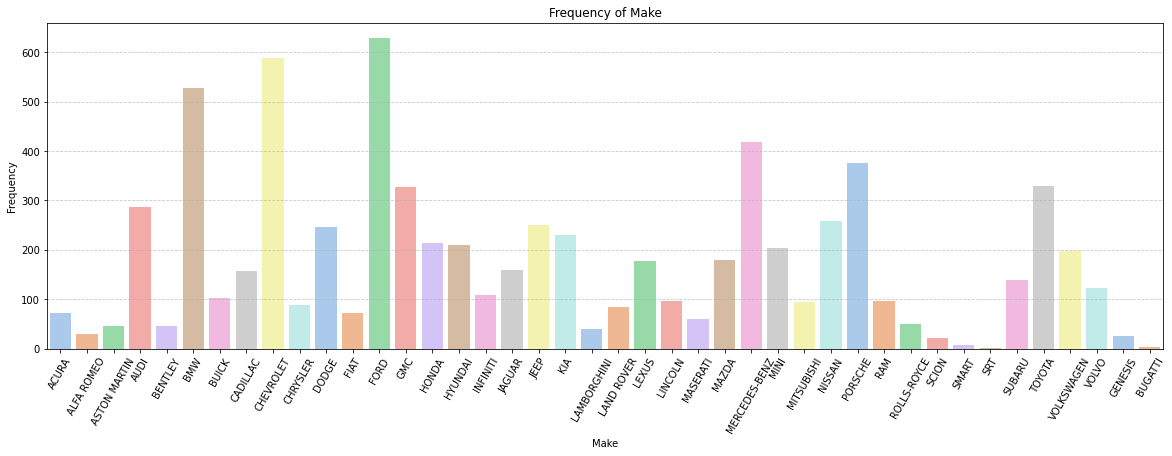

In [8]:
# Prepare histogram for categorical features using matplotlib
df_categorical_feature_matrix = pd.DataFrame(categorical_feature_matrix)

# Make frequency bar plot for Make
plt.figure(figsize=(20, 6))
sns.countplot(x=categorical_feature_matrix[:, 0], palette='pastel')
plt.xlabel("Make")
plt.ylabel("Frequency")
plt.title("Frequency of Make")
plt.xticks(rotation=60) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

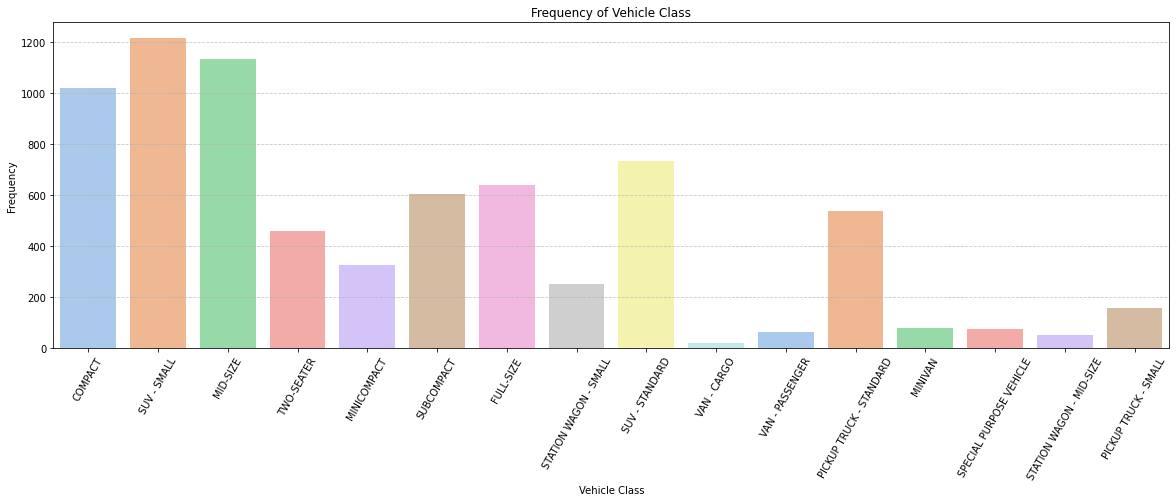

In [9]:
# Make frequency bar plot for Vehicle Class
plt.figure(figsize=(20, 6))
sns.countplot(x=categorical_feature_matrix[:, 2], palette='pastel')
plt.xlabel("Vehicle Class")
plt.ylabel("Frequency")
plt.title("Frequency of Vehicle Class")
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

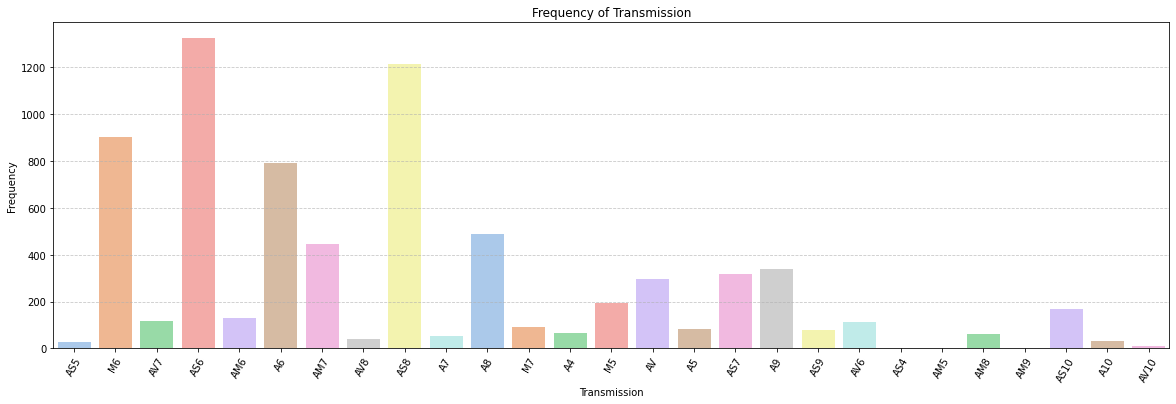

In [10]:
# Make frequency bar plot for Transmission
plt.figure(figsize=(20, 6))
sns.countplot(x=categorical_feature_matrix[:, 3], palette='pastel')
plt.xlabel("Transmission")
plt.ylabel("Frequency")
plt.title("Frequency of Transmission")
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

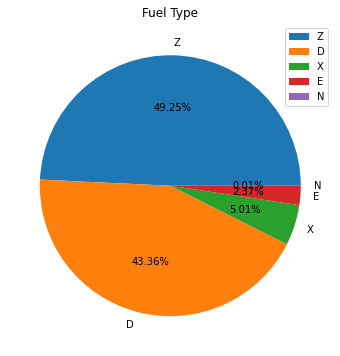

In [11]:
# Make a pie-chart for Fuel Type with legend and percentage
plt.figure(figsize=(20, 6))
plt.pie(df_categorical_feature_matrix.iloc[:, 4].value_counts(), labels=df_categorical_feature_matrix.iloc[:, 4].unique(), autopct='%1.2f%%')
plt.title("Fuel Type")
plt.legend()
plt.show()

#### 5 Insights about the Data

1. There is a clear majority of people using Z and D type fuels as almost 92% of the samples use these 2 fuel types only.
2. We see a very strong positive correlation (0.93) between the engine size and the number of cylinders which is also very intuitive.
3. Fuel consumption comb (mpg) shows a negative correlation with all the other features
4. Cars with lesser (4) cylinders leader to highest CO2 Emissions whereas cars with higher no of cylinders (16) lead to lesser CO2 Emissions
5. Almost 50% of the respondents prefer smaller, compact vehicle classes.

### Part B (t-SNE)
- We implement Part where we apply the t-SNE (t-distributed stochastic neighbour embedding) algorithm to the non-categorical features

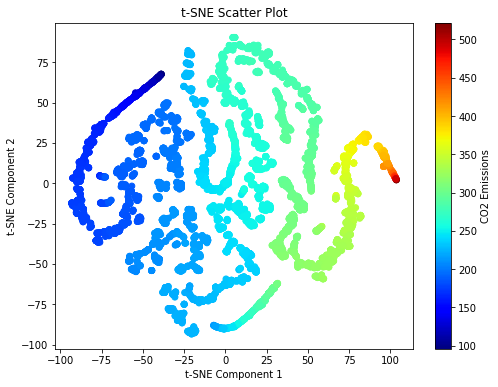

In [12]:
# Reduce the dimensionality of the data using t-SNE to 2 dimensions
from sklearn.manifold import TSNE

# Append the target vector to the non-categorical feature matrix
non_categorical_feature_matrix = np.column_stack((non_categorical_feature_matrix, target_vector))

# Reduce data dimensions to 2 using t-SNE
tsne = TSNE(n_components=2, random_state=0)
data_2d = tsne.fit_transform(non_categorical_feature_matrix)

# Create a scatter plot of the reduced data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=target_vector, cmap='jet')
plt.colorbar(label = 'CO2 Emissions')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Scatter Plot')
plt.show()

### Part C (Pre-Processing using Label-based Encoding)
- First, we perform pre-processing on the data
- Categorical features are encoded using label-based encoding
- First, we find out the number of distinct categories in each column

In [13]:
# find the number of distinct values in the columns containing categorical data
print("No. of Unique Categories in Make: ", df['Make'].nunique())
print("No. of Unique Categories in Model: ", df['Model'].nunique())
print("No. of Unique Categories in Vehicle Class: ", df['Vehicle Class'].nunique())
print("No. of Unique Categories in Transmission: ", df['Transmission'].nunique())
print("No. of Unique Categories in Fuel Type: ", df['Fuel Type'].nunique())

No. of Unique Categories in Make:  42
No. of Unique Categories in Model:  2053
No. of Unique Categories in Vehicle Class:  16
No. of Unique Categories in Transmission:  27
No. of Unique Categories in Fuel Type:  5


- Now we perform label-based encoding on each of these categorical features using Sklearn's Label Encoder

In [14]:
# Use label encoding to convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Make'] = labelencoder.fit_transform(df['Make'])
df['Model'] = labelencoder.fit_transform(df['Model'])
df['Vehicle Class'] = labelencoder.fit_transform(df['Vehicle Class'])
df['Transmission'] = labelencoder.fit_transform(df['Transmission'])
df['Fuel Type'] = labelencoder.fit_transform(df['Fuel Type'])

df_partc = df
df_partc.head(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


In [15]:
# Store the data in a matrix
features_partc = df.iloc[:, 0:11].values
features_partc = np.array(features_partc, dtype=float)
co2_emissions = df.iloc[:, -1].values
co2_emissions = np.array(co2_emissions, dtype=float)

print("Feature Matrix Shape: ", features_partc.shape)
print("Target Vector Shape: ", co2_emissions.shape)

# Perform pre-processing on the data (features_partc)
# 1. Replace the missing values with the mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(features_partc[:, 0:12])
features_partc[:, 0:12] = imputer.transform(features_partc[:, 0:12])

# 2. Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_partc = scaler.fit_transform(features_partc)

Feature Matrix Shape:  (7385, 11)
Target Vector Shape:  (7385,)


### Part C - Linear Regression
- We split the data into training and testing data 

In [16]:
# 3. Split the data into training and testing sets in a 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(features_partc, co2_emissions, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5908, 11)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 11)
Shape of y_test:  (1477,)


In [17]:
# Display the first 5 rows of the training and testing sets as a dataframe
df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)

print("First 5 rows of train data: ")
df_X_train.head(5)


First 5 rows of train data: 


,0,1,2,3,4,5,6,7,8,9,10
0,-1.288161,0.251899,0.753837,-0.118212,0.210575,0.409399,0.836161,-0.330435,-0.423371,-0.371700,0.209966
1,1.010515,-0.151926,-0.282941,0.620298,0.210575,-1.656713,-0.297083,0.612413,0.565702,0.596384,-0.758036
2,-1.464982,0.965957,-1.319720,-0.118212,0.210575,1.511325,0.836161,0.355272,-0.018750,0.250640,-0.481464
3,1.098925,-0.969974,1.375904,0.177192,0.210575,-0.692527,0.836161,-0.359006,-0.513287,-0.406274,0.209966
4,1.894621,1.466838,0.339125,-0.856721,-0.883408,0.409399,0.836161,-0.701859,-0.917907,-0.786593,0.624824


In [18]:
print("First 5 rows of test data: ")
df_X_test.head(5)

First 5 rows of test data: 


,0,1,2,3,4,5,6,7,8,9,10
0,1.098925,0.622793,-1.112364,-0.118212,0.210575,-0.554787,0.836161,-0.044723,-0.018750,-0.025955,-0.204892
1,-1.288161,0.295227,0.753837,0.915702,1.304558,-0.692527,0.836161,1.355262,1.150154,1.287873,-1.172894
2,-0.404055,1.076879,-0.075586,2.245019,1.304558,-1.243490,0.836161,1.012408,1.060238,1.045852,-1.034608
3,-0.934519,1.087278,-0.075586,1.580360,1.304558,-1.518972,-0.297083,0.583841,0.565702,0.596384,-0.758036
4,1.717800,-1.564445,1.168548,0.620298,0.210575,-0.003824,-0.297083,0.498128,1.285027,0.769257,-0.896322


- We now train a linear regression model on this training data and predict the values on the test set
- We then subsequently calculate the MSE, RMSE, MAE, R2 scores on the predictions made on the training and testing set using the `sklearn` package.
- For Adjusted-R2, since no library implementation exists we use the formula:
$$ 
Adjusted-R^2 = 1 - \frac{(1 - R^{2})*(N-1)}{(N-K-1)}
$$
- where N is the number of samples in our training data
- where K is the number of features in our training data

In [19]:
# Create a Linear Regression model
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression.predict(X_test)

print("Testing Data Accuracy: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score: ", r2_score(y_test, y_pred))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))

# Make predictions on the training data
y_pred_train = linear_regression.predict(X_train)
print()
print("Training Data Accuracy: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train, y_pred_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("R2 Score: ", r2_score(y_train, y_pred_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train, y_pred_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train, y_pred_train))

Testing Data Accuracy: 
Mean Squared Error (MSE):  295.3046695124161
Root Mean Squared Error (RMSE):  17.184431020910065
R2 Score:  0.9141463205390631
Adjusted R2 Score:  0.9135016854031789
Mean Absolute Error (MAE):  11.176630024206952

Training Data Accuracy: 
Mean Squared Error (MSE):  285.9853836055968
Root Mean Squared Error (RMSE):  16.911102377006557
R2 Score:  0.9163430991931094
Adjusted R2 Score:  0.9161870228856339
Mean Absolute Error (MAE):  10.971129887345167


### Part D - Principal Component Analysis


In [20]:
original_features = features_partc
original_co2_emissions = co2_emissions

#### Principal Components = 4

In [21]:
# Perform PCA on the original features with dim = 4
pca = PCA(n_components=4)

features_pca4 = pca.fit_transform(features_partc)

# Split the data into training and testing sets in a 80:20 ratio
X_train_pca4, X_test_pca4, y_train_pca4, y_test_pca4 = train_test_split(features_pca4, co2_emissions, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train_pca4.shape)
print("Shape of y_train: ", y_train_pca4.shape)
print("Shape of X_test: ", X_test_pca4.shape)
print("Shape of y_test: ", y_test_pca4.shape)

# Display the first 5 rows of the training set as a dataframe
print("Training Data (First 5 rows) after PCA: ")
df_X_train_pca4 = pd.DataFrame(X_train_pca4)
df_X_train_pca4.head(5)

Shape of X_train:  (5908, 4)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 4)
Shape of y_test:  (1477,)
Training Data (First 5 rows) after PCA: 


,0,1,2,3
0,-0.371072,-0.213922,-0.155995,-1.797488
1,1.505983,0.326201,0.357379,1.265759
2,0.196007,-1.129506,-0.115432,-1.329783
3,-0.337921,-0.366960,-0.536524,0.184423
4,-2.019209,0.239034,-2.263319,0.400475


In [22]:
# Create a Linear Regression model
linear_regression_pca4 = LinearRegression()

# Train the model
linear_regression_pca4.fit(X_train_pca4, y_train_pca4)

# Make predictions on the test data
y_pred_pca4 = linear_regression_pca4.predict(X_test_pca4)

# Calculate various accuracy metrics
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_pca4, y_pred_pca4))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_pca4, y_pred_pca4)))
print("R2 Score: ", r2_score(y_test_pca4, y_pred_pca4))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_pca4, y_pred_pca4))*(len(y_test_pca4)-1)/(len(y_test_pca4)-X_test_pca4.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_pca4, y_pred_pca4))

print()
# Make predictions on the training data
y_pred_train_pca4 = linear_regression_pca4.predict(X_train_pca4)

# Calculate various accuracy metrics
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_pca4, y_pred_train_pca4))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_pca4, y_pred_train_pca4)))
print("R2 Score: ", r2_score(y_train_pca4, y_pred_train_pca4))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_pca4, y_pred_train_pca4))*(len(y_train_pca4)-1)/(len(y_train_pca4)-X_train_pca4.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_pca4, y_pred_train_pca4))

Testing Data Accuracy: 
Mean Squared Error (MSE):  313.453985674029
Root Mean Squared Error (RMSE):  17.704631757651132
R2 Score:  0.9088697850384662
Adjusted R2 Score:  0.9086221485847663
Mean Absolute Error (MAE):  11.984308658316284

Training Data Accuracy: 
Mean Squared Error (MSE):  303.7484208560624
Root Mean Squared Error (RMSE):  17.428379754184334
R2 Score:  0.9111470271891616
Adjusted R2 Score:  0.9110868185001487
Mean Absolute Error (MAE):  11.740886306648317


#### Principal Components = 6

In [23]:
# Perform PCA on the original features with dim = 6
pca = PCA(n_components=6)

features_pca6 = pca.fit_transform(features_partc)

# Split the data into training and testing sets in a 80:20 ratio
X_train_pca6, X_test_pca6, y_train_pca6, y_test_pca6 = train_test_split(features_pca6, co2_emissions, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train_pca6.shape)
print("Shape of y_train: ", y_train_pca6.shape)
print("Shape of X_test: ", X_test_pca6.shape)
print("Shape of y_test: ", y_test_pca6.shape)

# Display the first 5 rows of the training set as a dataframe
print("Training Data (First 5 rows) after PCA: ")
df_X_train_pca6 = pd.DataFrame(X_train_pca6)
df_X_train_pca6.head(5)

Shape of X_train:  (5908, 6)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 6)
Shape of y_test:  (1477,)
Training Data (First 5 rows) after PCA: 


,0,1,2,3,4,5
0,-0.371072,-0.213922,-0.155995,-1.797488,-0.131916,-0.189713
1,1.505983,0.326201,0.357379,1.265759,-0.416256,1.215534
2,0.196007,-1.129506,-0.115432,-1.329783,2.008092,-0.801321
3,-0.337921,-0.366960,-0.536524,0.184423,-2.053570,0.806330
4,-2.019209,0.239034,-2.263319,0.400475,0.072920,0.969153


In [24]:
# Create a Linear Regression model
linear_regression_pca6 = LinearRegression()

# Train the model
linear_regression_pca6.fit(X_train_pca6, y_train_pca6)

# Make predictions on the test data
y_pred_pca6 = linear_regression_pca6.predict(X_test_pca6)

# Calculate various accuracy metrics
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_pca6, y_pred_pca6))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_pca6, y_pred_pca6)))
print("R2 Score: ", r2_score(y_test_pca6, y_pred_pca6))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_pca6, y_pred_pca6))*(len(y_test_pca6)-1)/(len(y_test_pca6)-X_test_pca6.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_pca6, y_pred_pca6))

print()

# Make predictions on the training data
y_pred_train_pca6 = linear_regression_pca6.predict(X_train_pca6)

# Calculate various accuracy metrics
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_pca6, y_pred_train_pca6))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_pca6, y_pred_train_pca6)))
print("R2 Score: ", r2_score(y_train_pca6, y_pred_train_pca6))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_pca6, y_pred_train_pca6))*(len(y_train_pca6)-1)/(len(y_train_pca6)-X_train_pca6.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_pca6, y_pred_train_pca6))

Testing Data Accuracy: 
Mean Squared Error (MSE):  306.52829356612665
Root Mean Squared Error (RMSE):  17.50794943921551
R2 Score:  0.9108832857096839
Adjusted R2 Score:  0.910519544018703
Mean Absolute Error (MAE):  11.889807260100595

Training Data Accuracy: 
Mean Squared Error (MSE):  300.35532273585795
Root Mean Squared Error (RMSE):  17.330762324140792
R2 Score:  0.9121395816662164
Adjusted R2 Score:  0.9120502472296798
Mean Absolute Error (MAE):  11.740880588065563


#### Principal Components = 8

In [25]:
# Perform PCA on the original features with dim = 8
pca = PCA(n_components=8)

features_pca8 = pca.fit_transform(features_partc)

# Split the data into training and testing sets in a 80:20 ratio
X_train_pca8, X_test_pca8, y_train_pca8, y_test_pca8 = train_test_split(features_pca8, co2_emissions, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train_pca8.shape)
print("Shape of y_train: ", y_train_pca8.shape)
print("Shape of X_test: ", X_test_pca8.shape)
print("Shape of y_test: ", y_test_pca8.shape)

# Display the first 5 rows of the training set as a dataframe
print("Training Data (First 5 rows) after PCA: ")
df_X_train_pca8 = pd.DataFrame(X_train_pca8)
df_X_train_pca8.head(5)

Shape of X_train:  (5908, 8)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 8)
Shape of y_test:  (1477,)
Training Data (First 5 rows) after PCA: 


,0,1,2,3,4,5,6,7
0,-0.371072,-0.213922,-0.155995,-1.797488,-0.131916,-0.189713,0.411237,-0.034307
1,1.505983,0.326201,0.357379,1.265759,-0.416256,1.215534,-0.426266,-0.205105
2,0.196007,-1.129506,-0.115432,-1.329783,2.008092,-0.801321,-0.684592,-0.121262
3,-0.337921,-0.366960,-0.536524,0.184423,-2.053570,0.806330,0.642325,-0.180946
4,-2.019209,0.239034,-2.263319,0.400475,0.072920,0.969153,-0.314195,-0.161598


In [26]:
# Create a Linear Regression model
linear_regression_pca8 = LinearRegression()

# Train the model
linear_regression_pca8.fit(X_train_pca8, y_train_pca8)

# Make predictions on the test data
y_pred_pca8 = linear_regression_pca8.predict(X_test_pca8)

# Calculate various accuracy metrics
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_pca8, y_pred_pca8))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_pca8, y_pred_pca8)))
print("R2 Score: ", r2_score(y_test_pca8, y_pred_pca8))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_pca8, y_pred_pca8))*(len(y_test_pca8)-1)/(len(y_test_pca8)-X_test_pca8.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_pca8, y_pred_pca8))

print()

# Make predictions on the training data
y_pred_train_pca8 = linear_regression_pca8.predict(X_train_pca8)

# Calculate various accuracy metrics
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_pca8, y_pred_train_pca8))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_pca8, y_pred_train_pca8)))
print("R2 Score: ", r2_score(y_train_pca8, y_pred_train_pca8))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_pca8, y_pred_train_pca8))*(len(y_train_pca8)-1)/(len(y_train_pca8)-X_train_pca8.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_pca8, y_pred_train_pca8))

Testing Data Accuracy: 
Mean Squared Error (MSE):  297.17186097849617
Root Mean Squared Error (RMSE):  17.23867341121399
R2 Score:  0.9136034735265668
Adjusted R2 Score:  0.9131326477692183
Mean Absolute Error (MAE):  11.212245629274559

Training Data Accuracy: 
Mean Squared Error (MSE):  287.0133908991423
Root Mean Squared Error (RMSE):  16.94146956137933
R2 Score:  0.9160423848590388
Adjusted R2 Score:  0.9159285247266218
Mean Absolute Error (MAE):  10.999324023053441


#### Principal Components = 10

In [27]:
# Perform PCA on the original features with dim = 10
pca = PCA(n_components=10)

features_pca10 = pca.fit_transform(features_partc)

# Split the data into training and testing sets in a 80:20 ratio
X_train_pca10, X_test_pca10, y_train_pca10, y_test_pca10 = train_test_split(features_pca10, co2_emissions, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train_pca10.shape)
print("Shape of y_train: ", y_train_pca10.shape)
print("Shape of X_test: ", X_test_pca10.shape)
print("Shape of y_test: ", y_test_pca10.shape)

# Display the first 5 rows of the training set as a dataframe
print("Training Data (First 5 rows) after PCA: ")
df_X_train_pca10 = pd.DataFrame(X_train_pca10)
df_X_train_pca10.head(5)

Shape of X_train:  (5908, 10)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 10)
Shape of y_test:  (1477,)
Training Data (First 5 rows) after PCA: 


,0,1,2,3,4,5,6,7,8,9
0,-0.371072,-0.213922,-0.155995,-1.797488,-0.131916,-0.189713,0.411237,-0.034307,0.152806,-0.032288
1,1.505983,0.326201,0.357379,1.265759,-0.416256,1.215534,-0.426266,-0.205105,-0.172409,0.055837
2,0.196007,-1.129506,-0.115432,-1.329783,2.008092,-0.801321,-0.684592,-0.121262,0.154948,0.075085
3,-0.337921,-0.366960,-0.536524,0.184423,-2.053570,0.806330,0.642325,-0.180946,0.043167,0.110861
4,-2.019209,0.239034,-2.263319,0.400475,0.072920,0.969153,-0.314195,-0.161598,0.041448,0.305281


In [28]:
# Create a Linear Regression model
linear_regression_pca10 = LinearRegression()

# Train the model
linear_regression_pca10.fit(X_train_pca10, y_train_pca10)

# Make predictions on the test data
y_pred_pca10 = linear_regression_pca10.predict(X_test_pca10)

# Calculate various accuracy metrics
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_pca10, y_pred_pca10))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_pca10, y_pred_pca10)))
print("R2 Score: ", r2_score(y_test_pca10, y_pred_pca10))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_pca10, y_pred_pca10))*(len(y_test_pca10)-1)/(len(y_test_pca10)-X_test_pca10.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_pca10, y_pred_pca10))

print()

# Make predictions on the training data
y_pred_train_pca10 = linear_regression_pca10.predict(X_train_pca10)

# Calculate various accuracy metrics
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_pca10, y_pred_train_pca10))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_pca10, y_pred_train_pca10)))
print("R2 Score: ", r2_score(y_train_pca10, y_pred_train_pca10))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_pca10, y_pred_train_pca10))*(len(y_train_pca10)-1)/(len(y_train_pca10)-X_train_pca10.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_pca10, y_pred_train_pca10))


Testing Data Accuracy: 
Mean Squared Error (MSE):  295.40471501862385
Root Mean Squared Error (RMSE):  17.18734170890379
R2 Score:  0.9141172343927598
Adjusted R2 Score:  0.9135314037951661
Mean Absolute Error (MAE):  11.17986313486445

Training Data Accuracy: 
Mean Squared Error (MSE):  286.01031062335426
Root Mean Squared Error (RMSE):  16.911839362510342
R2 Score:  0.9163358075020948
Adjusted R2 Score:  0.9161939316457307
Mean Absolute Error (MAE):  10.97307592979624


### Part E - One-Hot Encoding

- We take the original pre-processed data and apply one-hot encoding to that
- Then create a linear regression model and check results on that

In [29]:
original_features = feature_matrix
original_labels = target_vector

print("Original Features Shape: ", original_features.shape)
print("Original Labels Shape: ", original_labels.shape)

# Take column 0, 1, 2, 5 and 6 from the original features and store them in a new matrix
cat_features = original_features[:, [0, 1, 2, 5, 6]]
print("Categorical Features Shape: ", cat_features.shape)

# Display the first 5 rows of the categorical features
df_cat_features = pd.DataFrame(cat_features)
df_cat_features.head(5)

Original Features Shape:  (7385, 11)
Original Labels Shape:  (7385,)
Categorical Features Shape:  (7385, 5)


,0,1,2,3,4
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z


In [30]:
# Apply one-hot encoding to the categorical data in the original features
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()
cat_features = onehotencoder.fit_transform(cat_features).toarray()

# Display the shape of the categorical features after one-hot encoding
print("Categorical Features Shape after one-hot encoding: ", cat_features.shape)

# Display the first 5 rows of the categorical features after one-hot encoding
df_cat_features = pd.DataFrame(cat_features)
df_cat_features.head(5)


Categorical Features Shape after one-hot encoding:  (7385, 2143)


,0,1,2,3,4,5,6,7,8,9,...,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
# Take column 3, 4, 7, 8, 9 and 10 from the original features and merge them with the one-hot encoded categorical features
num_features = original_features[:, [3, 4, 7, 8, 9, 10]]

# Display the shape of the numerical features
print("Numerical Features Shape: ", num_features.shape)

# Display the first 5 rows of the numerical features
df_num_features = pd.DataFrame(num_features)
df_num_features.head(5)

Numerical Features Shape:  (7385, 6)


,0,1,2,3,4,5
0,2.0,4,9.9,6.7,8.5,33
1,2.4,4,11.2,7.7,9.6,29
2,1.5,4,6.0,5.8,5.9,48
3,3.5,6,12.7,9.1,11.1,25
4,3.5,6,12.1,8.7,10.6,27


In [32]:
# Concatenate the numerical and categorical features
features = np.concatenate((num_features, cat_features), axis=1)

# Display the shape of the features
print("Features Shape: ", features.shape)

# Display the first 5 rows of the features
df_features = pd.DataFrame(features)
df_features.head(5)

Features Shape:  (7385, 2149)


,0,1,2,3,4,5,6,7,8,9,...,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148
0,2.0,4,9.9,6.7,8.5,33,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.4,4,11.2,7.7,9.6,29,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.5,4,6.0,5.8,5.9,48,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.5,6,12.7,9.1,11.1,25,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,6,12.1,8.7,10.6,27,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- The data becomes high-dimensional after applying one-hot encoding
- We apply pre-processing which we applied in Part C of our solution

In [33]:
# Perform pre-processing on the data (features)
# 1. Replace the missing values with the mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(features)
original_features_onehot = imputer.transform(features)

# 2. Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
original_features_onehot = scaler.fit_transform(original_features_onehot)

In [34]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(original_features_onehot, original_labels, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Shape of X_train: ", X_train_onehot.shape)
print("Shape of y_train: ", y_train_onehot.shape)
print("Shape of X_test: ", X_test_onehot.shape)
print("Shape of y_test: ", y_test_onehot.shape)

# Display the first 5 rows of the training set as a dataframe
print("Training Data (First 5 rows) after One-Hot Encoding: ")
df_X_train_onehot = pd.DataFrame(X_train_onehot)
df_X_train_onehot.head(5)

Shape of X_train:  (5908, 2149)
Shape of y_train:  (5908,)
Shape of X_test:  (1477, 2149)
Shape of y_test:  (1477,)
Training Data (First 5 rows) after One-Hot Encoding: 


,0,1,2,3,4,5,6,7,8,9,...,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148
0,-0.118212,0.210575,-0.330435,-0.423371,-0.371700,0.209966,-0.099224,-0.063866,-0.080031,-0.200717,...,-0.127428,-0.072863,-0.163815,-0.37277,-0.111696,-0.155794,-0.229661,-0.011637,-0.985081,1.142966
1,0.620298,0.210575,0.612413,0.565702,0.596384,-0.758036,-0.099224,-0.063866,-0.080031,-0.200717,...,-0.127428,-0.072863,-0.163815,-0.37277,-0.111696,-0.155794,-0.229661,-0.011637,1.015145,-0.874917
2,-0.118212,0.210575,0.355272,-0.018750,0.250640,-0.481464,-0.099224,-0.063866,-0.080031,4.982136,...,-0.127428,-0.072863,-0.163815,2.68262,-0.111696,-0.155794,-0.229661,-0.011637,-0.985081,1.142966
3,0.177192,0.210575,-0.359006,-0.513287,-0.406274,0.209966,-0.099224,-0.063866,-0.080031,-0.200717,...,-0.127428,-0.072863,-0.163815,-0.37277,-0.111696,-0.155794,-0.229661,-0.011637,-0.985081,1.142966
4,-0.856721,-0.883408,-0.701859,-0.917907,-0.786593,0.624824,-0.099224,-0.063866,-0.080031,-0.200717,...,-0.127428,-0.072863,-0.163815,-0.37277,-0.111696,-0.155794,-0.229661,-0.011637,-0.985081,1.142966


In [35]:
# Create a Linear Regression model
linear_regression_onehot = LinearRegression()

# Train the model
linear_regression_onehot.fit(X_train_onehot, y_train_onehot)

# Make predictions on the test data
y_pred_onehot = linear_regression_onehot.predict(X_test_onehot)

# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot, y_pred_onehot))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot, y_pred_onehot)))
print("R2 Score: ", r2_score(y_test_onehot, y_pred_onehot))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot, y_pred_onehot))*(len(y_test_onehot)-1)/(len(y_test_onehot)-X_test_onehot.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot, y_pred_onehot))

Mean Squared Error (MSE):  1.0891751243635011e+30
Root Mean Squared Error (RMSE):  1043635532340434.0
R2 Score:  -3.166549725012001e+26
Adjusted R2 Score:  6.94476581592528e+26
Mean Absolute Error (MAE):  270462981971696.2


### Part F: One-Hot Encoding with PCA

- We are going to apply dimensionality reduction (through PCA) on the one-hot encoded dataset.
- We are going to experiment with the following Principal Components (PCs):
1. PCs = 10
2. PCs = 50
3. PCs = 100
4. PCs = 200
5. PCs = 400
6. PCs = 800

### 1. PCs = 10

In [36]:
# Apply PCA to the one-hot encoded features with dim = 10
pca = PCA(n_components=10)

original_features_onehot_pca10 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca10 = pd.DataFrame(original_features_onehot_pca10)
df_pca10.head(5)

,0,1,2,3,4,5,6,7,8,9
0,-2.033039,1.944883,-0.991652,0.401626,-0.733228,-0.688993,1.946507,-0.444547,-5.202311,-0.409223
1,-1.595987,2.322276,-0.773544,0.021126,-1.228179,0.362863,1.221614,-0.300079,-4.273882,-1.373201
2,-4.411712,2.302438,-1.025900,1.075433,0.516447,1.024204,1.086226,-1.235331,-4.653146,0.525083
3,0.099959,0.866412,-0.679264,0.525925,-2.464233,-2.349212,0.724172,-0.091503,-2.374841,0.085395
4,-0.230400,0.909321,-0.689509,0.466009,-2.430336,-2.199725,0.601798,0.051488,-2.556116,0.153009


In [37]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca10, X_test_onehot_pca10, y_train_onehot_pca10, y_test_onehot_pca10 = train_test_split(original_features_onehot_pca10, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca10 = LinearRegression()

# Train the model
linear_regression_onehot_pca10.fit(X_train_onehot_pca10, y_train_onehot_pca10)

# Make predictions on the test data
y_pred_onehot_pca10 = linear_regression_onehot_pca10.predict(X_test_onehot_pca10)

# Calculate various accuracy metrics
print("Testing Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca10, y_pred_onehot_pca10))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca10, y_pred_onehot_pca10)))
print("R2 Score: ", r2_score(y_test_onehot_pca10, y_pred_onehot_pca10))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca10, y_pred_onehot_pca10))*(len(y_test_onehot_pca10)-1)/(len(y_test_onehot_pca10)-X_test_onehot_pca10.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca10, y_pred_onehot_pca10))

print()

# Make predictions on the training data
y_pred_train_onehot_pca10 = linear_regression_onehot_pca10.predict(X_train_onehot_pca10)

# Calculate various accuracy metrics
print("Training Data Accuracy: ")
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca10, y_pred_train_onehot_pca10))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca10, y_pred_train_onehot_pca10)))
print("R2 Score: ", r2_score(y_train_onehot_pca10, y_pred_train_onehot_pca10))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca10, y_pred_train_onehot_pca10))*(len(y_train_onehot_pca10)-1)/(len(y_train_onehot_pca10)-X_train_onehot_pca10.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca10, y_pred_train_onehot_pca10))

Testing Data Accuracy: 
Mean Squared Error (MSE):  490.1077187779534
Root Mean Squared Error (RMSE):  22.138376606651928
R2 Score:  0.8575113930342905
Adjusted R2 Score:  0.8565394380072393
Mean Absolute Error (MAE):  14.90957089103724

Training Data Accuracy: 
Mean Squared Error (MSE):  479.37489798594623
Root Mean Squared Error (RMSE):  21.894631716152393
R2 Score:  0.8597724898226624
Adjusted R2 Score:  0.8595346951640609
Mean Absolute Error (MAE):  14.978729175936795


### 2. PCs = 50

In [38]:
# Apply PCA to the one-hot encoded features with dim = 50
pca = PCA(n_components=50)

original_features_onehot_pca50 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca50 = pd.DataFrame(original_features_onehot_pca50)
df_pca50.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-2.033521,-1.848250,-0.259402,-0.301389,-0.717100,-1.202227,0.756312,-0.342310,-0.042904,-0.834269,...,0.655711,-0.106188,-1.863768,-1.878601,-1.318737,-2.513338,-0.081894,-4.109405,-2.588625,-2.759815
1,-1.596146,-2.252719,-0.157550,-0.534628,-0.974851,-0.513117,0.625083,-0.291231,-0.453110,0.119584,...,0.015872,-0.138037,-0.552286,-0.934136,-1.544681,-2.606344,-1.188948,-1.335376,-1.509053,-1.982323
2,-4.412092,-2.237149,-0.413805,0.572090,0.415970,0.840431,0.818819,-0.798514,0.266772,-1.777270,...,-0.291944,-1.001682,-0.369248,-1.986345,1.061535,-0.771842,-0.244560,1.820953,-0.315708,-0.475095
3,0.099817,-0.830293,-0.229460,0.047772,-1.196767,-3.031196,-0.714052,0.936126,-0.073344,-0.823055,...,0.147932,0.847626,-0.387045,-1.270944,-0.515441,-2.192039,-0.700922,-1.023577,-0.841787,1.163371
4,-0.230608,-0.871154,-0.209428,0.029634,-1.242324,-2.843963,-0.762871,0.915471,-0.243446,-0.976573,...,-0.227314,0.651502,-0.227336,-1.122372,-0.610607,-1.906383,-0.590188,-0.722899,-1.376848,0.501622


In [39]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca50, X_test_onehot_pca50, y_train_onehot_pca50, y_test_onehot_pca50 = train_test_split(original_features_onehot_pca50, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca50 = LinearRegression()

# Train the model
linear_regression_onehot_pca50.fit(X_train_onehot_pca50, y_train_onehot_pca50)

# Make predictions on the test data
y_pred_onehot_pca50 = linear_regression_onehot_pca50.predict(X_test_onehot_pca50)
print("Test Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca50, y_pred_onehot_pca50))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca50, y_pred_onehot_pca50)))
print("R2 Score: ", r2_score(y_test_onehot_pca50, y_pred_onehot_pca50))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca50, y_pred_onehot_pca50))*(len(y_test_onehot_pca50)-1)/(len(y_test_onehot_pca50)-X_test_onehot_pca50.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca50, y_pred_onehot_pca50))

# Make predictions on the training data
y_pred_train_onehot_pca50 = linear_regression_onehot_pca50.predict(X_train_onehot_pca50)

print()
print("Training Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca50, y_pred_train_onehot_pca50))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca50, y_pred_train_onehot_pca50)))
print("R2 Score: ", r2_score(y_train_onehot_pca50, y_pred_train_onehot_pca50))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca50, y_pred_train_onehot_pca50))*(len(y_train_onehot_pca50)-1)/(len(y_train_onehot_pca50)-X_train_onehot_pca50.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca50, y_pred_train_onehot_pca50))

Test Data Accuracy Metrics:
Mean Squared Error (MSE):  327.14116280710977
Root Mean Squared Error (RMSE):  18.08704405941197
R2 Score:  0.904890523483785
Adjusted R2 Score:  0.9015556891038335
Mean Absolute Error (MAE):  12.83027377392279

Training Data Accuracy Metrics:
Mean Squared Error (MSE):  317.847985254128
Root Mean Squared Error (RMSE):  17.828291708801714
R2 Score:  0.9070226001104126
Adjusted R2 Score:  0.9062288712399192
Mean Absolute Error (MAE):  12.777049128319685


### 3. PCs = 100

In [40]:
# Apply PCA to the one-hot encoded features with dim = 100
pca = PCA(n_components=100)

original_features_onehot_pca100 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca100 = pd.DataFrame(original_features_onehot_pca100)


In [41]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca100, X_test_onehot_pca100, y_train_onehot_pca100, y_test_onehot_pca100 = train_test_split(original_features_onehot_pca100, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca100 = LinearRegression()

# Train the model
linear_regression_onehot_pca100.fit(X_train_onehot_pca100, y_train_onehot_pca100)

# Make predictions on the test data
y_pred_onehot_pca100 = linear_regression_onehot_pca100.predict(X_test_onehot_pca100)
print("Test Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca100, y_pred_onehot_pca100))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca100, y_pred_onehot_pca100)))
print("R2 Score: ", r2_score(y_test_onehot_pca100, y_pred_onehot_pca100))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca100, y_pred_onehot_pca100))*(len(y_test_onehot_pca100)-1)/(len(y_test_onehot_pca100)-X_test_onehot_pca100.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca100, y_pred_onehot_pca100))

# Make predictions on the training data
y_pred_onehot_pca100_train = linear_regression_onehot_pca100.predict(X_train_onehot_pca100)

print()
print("Training Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca100, y_pred_onehot_pca100_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca100, y_pred_onehot_pca100_train)))
print("R2 Score: ", r2_score(y_train_onehot_pca100, y_pred_onehot_pca100_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca100, y_pred_onehot_pca100_train))*(len(y_train_onehot_pca100)-1)/(len(y_train_onehot_pca100)-X_train_onehot_pca100.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca100, y_pred_onehot_pca100_train))

Test Data Accuracy Metrics:
Mean Squared Error (MSE):  190.45012010202026
Root Mean Squared Error (RMSE):  13.800366665491909
R2 Score:  0.9446305959484724
Adjusted R2 Score:  0.9406066567005417
Mean Absolute Error (MAE):  9.913136138686198

Training Data Accuracy Metrics:
Mean Squared Error (MSE):  168.35836164844008
Root Mean Squared Error (RMSE):  12.975298133316247
R2 Score:  0.950751543373077
Adjusted R2 Score:  0.9499034556061247
Mean Absolute Error (MAE):  9.69501088228281


### 3. PCs = 200

In [42]:
# Apply PCA to the one-hot encoded features with dim = 200
pca = PCA(n_components=200)

original_features_onehot_pca200 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca200 = pd.DataFrame(original_features_onehot_pca200)
df_pca200.head(5)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-2.033574,-1.848093,-0.245923,-0.284193,-0.754209,-1.158982,0.774054,-0.367879,0.140595,-0.893101,...,-0.065298,0.042158,-0.560502,0.607586,-0.141049,0.234268,0.961459,-0.134451,-0.473288,0.416077
1,-1.596164,-2.253158,-0.147170,-0.518607,-1.005408,-0.497576,0.642618,-0.322849,-0.337800,0.118128,...,-0.065364,0.041949,-0.560583,0.607926,-0.141452,0.234290,0.961533,-0.135020,-0.473248,0.416405
2,-4.412036,-2.238187,-0.418970,0.515750,0.321876,0.867901,0.785447,-0.873728,0.399863,-1.820961,...,-1.524434,-1.976503,-0.677879,0.519203,-0.234750,-0.554543,-0.899934,-1.630899,-0.519200,0.514925
3,0.099802,-0.832684,-0.221294,0.083862,-1.198815,-3.000575,-0.694920,0.936903,0.042817,-0.865294,...,0.547584,0.335647,-0.704948,-3.582676,1.052693,1.308552,-0.743650,-0.873609,2.966371,-3.035255
4,-0.230582,-0.872736,-0.204355,0.043993,-1.270876,-2.826276,-0.756604,0.884842,-0.120143,-1.001633,...,0.145764,-0.353252,1.646949,-0.688598,-0.403023,0.040540,0.106686,-0.383739,-0.272672,0.414075


In [43]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca200, X_test_onehot_pca200, y_train_onehot_pca200, y_test_onehot_pca200 = train_test_split(original_features_onehot_pca200, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca200 = LinearRegression()

# Train the model
linear_regression_onehot_pca200.fit(X_train_onehot_pca200, y_train_onehot_pca200)

# Make predictions on the test data
y_pred_onehot_pca200 = linear_regression_onehot_pca200.predict(X_test_onehot_pca200)

print("Test Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca200, y_pred_onehot_pca200))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca200, y_pred_onehot_pca200)))
print("R2 Score: ", r2_score(y_test_onehot_pca200, y_pred_onehot_pca200))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca200, y_pred_onehot_pca200))*(len(y_test_onehot_pca200)-1)/(len(y_test_onehot_pca200)-X_test_onehot_pca200.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca200, y_pred_onehot_pca200))

# Make predictions on the train data
y_pred_train = linear_regression_onehot_pca200.predict(X_train_onehot_pca200)

print()
print("Train Data Accuracy Metrics: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca200, y_pred_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca200, y_pred_train)))
print("R2 Score: ", r2_score(y_train_onehot_pca200, y_pred_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca200, y_pred_train))*(len(y_train_onehot_pca200)-1)/(len(y_train_onehot_pca200)-X_train_onehot_pca200.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca200, y_pred_train))

Test Data Accuracy Metrics:
Mean Squared Error (MSE):  155.56669750781873
Root Mean Squared Error (RMSE):  12.472637953048213
R2 Score:  0.9547722242093729
Adjusted R2 Score:  0.9476832311387418
Mean Absolute Error (MAE):  9.088078688394505

Train Data Accuracy Metrics: 
Mean Squared Error (MSE):  141.20870549942344
Root Mean Squared Error (RMSE):  11.883126924316825
R2 Score:  0.9586934041170224
Adjusted R2 Score:  0.9572458276010604
Mean Absolute Error (MAE):  8.817754371506853


### 4. PCs = 400

In [44]:
# Apply PCA to the one-hot encoded features with dim = 400
pca = PCA(n_components=400)

original_features_onehot_pca400 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca400 = pd.DataFrame(original_features_onehot_pca400)
df_pca400.head(5)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-2.033952,-1.842270,-0.252280,-0.253269,-0.792021,-1.183470,0.792205,-0.358250,0.203420,-0.824042,...,0.238106,-0.245658,-0.179820,-0.115972,0.722490,0.038381,0.163725,-0.074160,0.122599,-0.093251
1,-1.596588,-2.247403,-0.157183,-0.483157,-1.039386,-0.522997,0.654633,-0.301243,-0.286174,0.168560,...,0.244456,-0.244319,-0.182738,-0.114441,0.730485,0.035398,0.164734,-0.075063,0.120674,-0.090897
2,-4.411474,-2.239625,-0.477347,0.482204,0.315859,0.850878,0.768850,-0.801080,0.373008,-1.805574,...,-0.838699,0.716514,-0.063508,-0.014386,-1.721187,1.994838,-1.553601,-0.385274,1.234965,-1.910686
3,0.101268,-0.828267,-0.234882,0.035800,-1.134677,-2.941456,-0.715050,0.921126,-0.045797,-0.695690,...,-0.686473,2.173714,1.231003,0.327698,-2.545974,0.413378,1.771774,4.065230,1.527123,1.404393
4,-0.231131,-0.870212,-0.225783,0.021801,-1.299622,-2.821838,-0.737260,0.938905,-0.158399,-0.951732,...,-0.479347,-0.381060,-0.157246,-0.194969,0.443663,-0.016734,-0.225964,0.307240,0.251117,-0.021343


In [45]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca400, X_test_onehot_pca400, y_train_onehot_pca400, y_test_onehot_pca400 = train_test_split(original_features_onehot_pca400, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca400 = LinearRegression()

# Train the model
linear_regression_onehot_pca400.fit(X_train_onehot_pca400, y_train_onehot_pca400)

# Make predictions on the test data
y_pred_onehot_pca400 = linear_regression_onehot_pca400.predict(X_test_onehot_pca400)
print("Test Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca400, y_pred_onehot_pca400))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca400, y_pred_onehot_pca400)))
print("R2 Score: ", r2_score(y_test_onehot_pca400, y_pred_onehot_pca400))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca400, y_pred_onehot_pca400))*(len(y_test_onehot_pca400)-1)/(len(y_test_onehot_pca400)-X_test_onehot_pca400.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca400, y_pred_onehot_pca400))

# Make predictions on the train data
y_pred_train = linear_regression_onehot_pca400.predict(X_train_onehot_pca400)

print()
print("Train Data Accuracy Metrics: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca400, y_pred_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca400, y_pred_train)))
print("R2 Score: ", r2_score(y_train_onehot_pca400, y_pred_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca400, y_pred_train))*(len(y_train_onehot_pca400)-1)/(len(y_train_onehot_pca400)-X_train_onehot_pca400.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca400, y_pred_train))

Test Data Accuracy Metrics:
Mean Squared Error (MSE):  172.7506186098715
Root Mean Squared Error (RMSE):  13.143462961102433
R2 Score:  0.9497763572066141
Adjusted R2 Score:  0.9311058580269168
Mean Absolute Error (MAE):  9.830725935842162

Train Data Accuracy Metrics: 
Mean Squared Error (MSE):  146.65982796347177
Root Mean Squared Error (RMSE):  12.110319069432967
R2 Score:  0.9570988330745737
Adjusted R2 Score:  0.9539827141767763
Mean Absolute Error (MAE):  9.057120027603895


### 6. PCs = 800


In [46]:
# Apply PCA to the one-hot encoded features with dim = 800
pca = PCA(n_components=800)

original_features_onehot_pca800 = pca.fit_transform(original_features_onehot)

# Display the data as a dataframe
df_pca800 = pd.DataFrame(original_features_onehot_pca800)
df_pca800.head(5)

,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,-2.033657,-1.848048,-0.241748,-0.291728,-0.766882,-1.169555,0.754210,-0.370703,0.133757,-0.889835,...,0.020992,0.162209,-0.014058,-0.023989,-0.112082,-0.138343,-0.004375,0.130143,-0.056040,0.011387
1,-1.596252,-2.253114,-0.144083,-0.525147,-1.017621,-0.509514,0.623674,-0.325571,-0.346932,0.119735,...,0.021816,0.162925,-0.013933,-0.024103,-0.112406,-0.137507,-0.001051,0.124428,-0.057874,0.013965
2,-4.412145,-2.235976,-0.439977,0.528168,0.330092,0.892227,0.765470,-0.898297,0.316533,-1.687045,...,-1.839753,-0.015020,1.032067,-0.152768,-0.037929,0.306920,2.345555,-0.465989,1.439459,0.537755
3,0.099861,-0.838442,-0.224630,0.105777,-1.221514,-3.059689,-0.708449,0.981627,0.058433,-0.787118,...,-2.468630,-2.330603,-0.016775,1.073815,-0.469455,0.343889,-0.320336,-0.983945,5.097507,-6.840566
4,-0.230390,-0.873535,-0.211537,0.058537,-1.272375,-2.812232,-0.728725,0.878078,-0.107228,-1.015811,...,-0.164480,-0.145494,-0.017270,-0.392070,0.078341,-0.058465,-0.027162,0.031727,0.213951,0.110455


In [47]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_onehot_pca800, X_test_onehot_pca800, y_train_onehot_pca800, y_test_onehot_pca800 = train_test_split(original_features_onehot_pca800, original_labels, test_size=0.2, random_state=42)

# Create a Linear Regression model
linear_regression_onehot_pca800 = LinearRegression()

# Train the model
linear_regression_onehot_pca800.fit(X_train_onehot_pca800, y_train_onehot_pca800)

# Make predictions on the test data
y_pred_onehot_pca800 = linear_regression_onehot_pca800.predict(X_test_onehot_pca800)
print("Test Data Accuracy Metrics:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_onehot_pca800, y_pred_onehot_pca800))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_onehot_pca800, y_pred_onehot_pca800)))
print("R2 Score: ", r2_score(y_test_onehot_pca800, y_pred_onehot_pca800))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_onehot_pca800, y_pred_onehot_pca800))*(len(y_test_onehot_pca800)-1)/(len(y_test_onehot_pca800)-X_test_onehot_pca800.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_onehot_pca800, y_pred_onehot_pca800))

# Make predictions on the train data
y_pred_train = linear_regression_onehot_pca800.predict(X_train_onehot_pca800)

print()
print("Train Data Accuracy Metrics: ")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_train_onehot_pca800, y_pred_train))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_train_onehot_pca800, y_pred_train)))
print("R2 Score: ", r2_score(y_train_onehot_pca800, y_pred_train))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_train_onehot_pca800, y_pred_train))*(len(y_train_onehot_pca800)-1)/(len(y_train_onehot_pca800)-X_train_onehot_pca800.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_train_onehot_pca800, y_pred_train))

Test Data Accuracy Metrics:
Mean Squared Error (MSE):  159.67196429322033
Root Mean Squared Error (RMSE):  12.636137237827876
R2 Score:  0.9535787034320772
Adjusted R2 Score:  0.898642257789565
Mean Absolute Error (MAE):  9.281260320618669

Train Data Accuracy Metrics: 
Mean Squared Error (MSE):  108.73515635600968
Root Mean Squared Error (RMSE):  10.427615084764573
R2 Score:  0.9681926185359131
Adjusted R2 Score:  0.9632100641651926
Mean Absolute Error (MAE):  7.724745822948624


### Part G: L1 and L2 regularisation 
- We take the pre-processed dataset from Section C with categorical-encoding.
- We train two different linear regression models, one with L1 regularisation `(Lasso Regression)` and L2 regularisation `(Ridge Regression)`. We use the sklearn implementations of these for solving this question

In [48]:
# Take the dataset from Part C
features_partg = features_partc
co2_emissions_partg = co2_emissions

print("Feature Shape: ", features_partg.shape)
print("Label Shape: ", co2_emissions_partg.shape)

# Represent the data as a dataframe
df_features_partg = pd.DataFrame(features_partg)
df_features_partg.head(5)

Feature Shape:  (7385, 11)
Label Shape:  (7385,)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.730214,0.057785,-1.319720,-0.856721,-0.883408,-0.003824,0.836161,-0.759002,-1.052781,-0.855742,0.763110
1,-1.730214,0.057785,-1.319720,-0.561317,-0.883408,1.511325,0.836161,-0.387577,-0.603202,-0.475423,0.209966
2,-1.730214,0.059519,-1.319720,-1.225976,-0.883408,1.098102,0.836161,-1.873275,-1.457401,-1.754677,2.837400
3,-1.730214,0.362820,0.961192,0.251043,0.210575,0.133917,0.836161,0.040990,0.026208,0.043193,-0.343178
4,-1.730214,0.823839,0.961192,0.251043,0.210575,0.133917,0.836161,-0.130437,-0.153624,-0.129679,-0.066606


In [49]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_partg, X_test_partg, y_train_partg, y_test_partg = train_test_split(features_partg, co2_emissions_partg, test_size=0.2, random_state=42)

# Create a Lasso Regression model
lasso_regression = Lasso()

# Train the model
lasso_regression.fit(X_train_partg, y_train_partg)

# Make predictions on the test data
y_pred_partf_lasso = lasso_regression.predict(X_test_partg)

lasso_metrics = []

print("Test Data Accuracy Metrics for L1 (Lasso) Regression:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_partg, y_pred_partf_lasso))
lasso_metrics.append(mean_squared_error(y_test_partg, y_pred_partf_lasso))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_partg, y_pred_partf_lasso)))
lasso_metrics.append(np.sqrt(mean_squared_error(y_test_partg, y_pred_partf_lasso)))
print("R2 Score: ", r2_score(y_test_partg, y_pred_partf_lasso))
lasso_metrics.append(r2_score(y_test_partg, y_pred_partf_lasso))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_partg, y_pred_partf_lasso))*(len(y_test_partg)-1)/(len(y_test_partg)-X_test_partg.shape[1]-1))
lasso_metrics.append(1 - (1-r2_score(y_test_partg, y_pred_partf_lasso))*(len(y_test_partg)-1)/(len(y_test_partg)-X_test_partg.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_partg, y_pred_partf_lasso))
lasso_metrics.append(mean_absolute_error(y_test_partg, y_pred_partf_lasso))

Test Data Accuracy Metrics for L1 (Lasso) Regression:
Mean Squared Error (MSE):  298.9043461605072
Root Mean Squared Error (RMSE):  17.288850342359588
R2 Score:  0.9130997895593177
Adjusted R2 Score:  0.9124472965116402
Mean Absolute Error (MAE):  11.264857657335039


In [50]:
# Create a Ridge Regression object
ridge_regression = Ridge()

# Train the model
ridge_regression.fit(X_train_partg, y_train_partg)

# Make predictions on the test data
y_pred_partf_ridge = ridge_regression.predict(X_test_partg)

ridge_metrics = []

print("Test Data Accuracy Metrics for L2 (Ridge) Regression:")
# Calculate various accuracy metrics
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_partg, y_pred_partf_ridge))
ridge_metrics.append(mean_squared_error(y_test_partg, y_pred_partf_ridge))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_partg, y_pred_partf_ridge)))
ridge_metrics.append(np.sqrt(mean_squared_error(y_test_partg, y_pred_partf_ridge)))
print("R2 Score: ", r2_score(y_test_partg, y_pred_partf_ridge))
ridge_metrics.append(r2_score(y_test_partg, y_pred_partf_ridge))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_partg, y_pred_partf_ridge))*(len(y_test_partg)-1)/(len(y_test_partg)-X_test_partg.shape[1]-1))
ridge_metrics.append(1 - (1-r2_score(y_test_partg, y_pred_partf_ridge))*(len(y_test_partg)-1)/(len(y_test_partg)-X_test_partg.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_partg, y_pred_partf_ridge))
ridge_metrics.append(mean_absolute_error(y_test_partg, y_pred_partf_ridge))

Test Data Accuracy Metrics for L2 (Ridge) Regression:
Mean Squared Error (MSE):  295.3554124558002
Root Mean Squared Error (RMSE):  17.185907379472294
R2 Score:  0.9141315680855939
Adjusted R2 Score:  0.9134868221804345
Mean Absolute Error (MAE):  11.177800164557482


- Now we compare the metrics obtained by both Regularisation Techniques

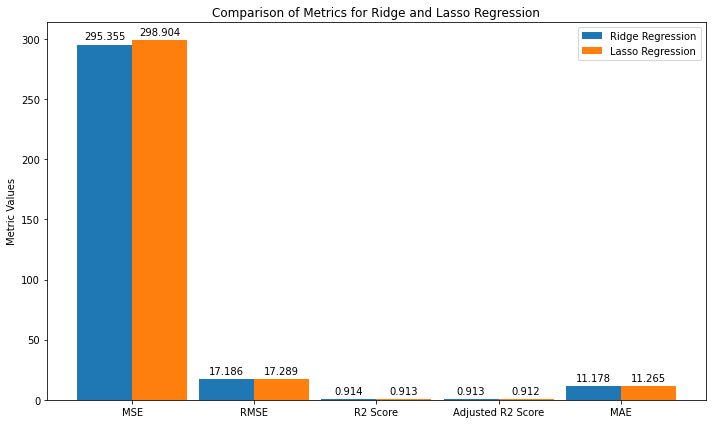

In [51]:
# Compare the metrics for Lasso and Ridge Regression using a plot
metrics = ["MSE", "RMSE", "R2 Score", "Adjusted R2 Score", "MAE"]

# Round off everything to two decimal places in the lists
ridge_values = [round(i, 3) for i in ridge_metrics]
lasso_values = [round(i, 3) for i in lasso_metrics]

# Width of the bars
width = 0.45  
x = np.arange(len(metrics)) 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ridge_values, width, label='Ridge Regression')
rects2 = ax.bar(x + width/2, lasso_values, width, label='Lasso Regression')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Metrics for Ridge and Lasso Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add the metric values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()

### Part H - SGDRegressor Library
- We use the `SGDRegressor` library from sklearn to perform linear-regression on the pre-processed data from Part C.

In [52]:
# Take the dataset from Part C
features_parth = features_partc
co2_emissions_parth = co2_emissions

print("Feature Shape: ", features_parth.shape)
print("Label Shape: ", co2_emissions_parth.shape)

# Represent the data as a dataframe
df_features_parth = pd.DataFrame(features_parth)
df_features_parth.head(5)

Feature Shape:  (7385, 11)
Label Shape:  (7385,)


,0,1,2,3,4,5,6,7,8,9,10
0,-1.730214,0.057785,-1.319720,-0.856721,-0.883408,-0.003824,0.836161,-0.759002,-1.052781,-0.855742,0.763110
1,-1.730214,0.057785,-1.319720,-0.561317,-0.883408,1.511325,0.836161,-0.387577,-0.603202,-0.475423,0.209966
2,-1.730214,0.059519,-1.319720,-1.225976,-0.883408,1.098102,0.836161,-1.873275,-1.457401,-1.754677,2.837400
3,-1.730214,0.362820,0.961192,0.251043,0.210575,0.133917,0.836161,0.040990,0.026208,0.043193,-0.343178
4,-1.730214,0.823839,0.961192,0.251043,0.210575,0.133917,0.836161,-0.130437,-0.153624,-0.129679,-0.066606


In [53]:
# Split the data into training and testing sets in a 80:20 ratio
X_train_parth, X_test_parth, y_train_parth, y_test_parth = train_test_split(features_parth, co2_emissions_parth, test_size=0.2, random_state=42)

# Create a SGD Regression model
sgd_regression = SGDRegressor()

# Train the model
sgd_regression.fit(X_train_parth, y_train_parth)

# Make predictions on the test data
y_pred_partf_sgd = sgd_regression.predict(X_test_parth)

sgd_metrics = []

# Calculate various accuracy metrics
print("Test Data Accuracy Metrics for SGD Regression:")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_parth, y_pred_partf_sgd))
sgd_metrics.append(mean_squared_error(y_test_parth, y_pred_partf_sgd))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_parth, y_pred_partf_sgd)))
sgd_metrics.append(np.sqrt(mean_squared_error(y_test_parth, y_pred_partf_sgd)))
print("R2 Score: ", r2_score(y_test_parth, y_pred_partf_sgd))
sgd_metrics.append(r2_score(y_test_parth, y_pred_partf_sgd))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_parth, y_pred_partf_sgd))*(len(y_test_parth)-1)/(len(y_test_parth)-X_test_parth.shape[1]-1))
sgd_metrics.append(1 - (1-r2_score(y_test_parth, y_pred_partf_sgd))*(len(y_test_parth)-1)/(len(y_test_parth)-X_test_parth.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_parth, y_pred_partf_sgd))
sgd_metrics.append(mean_absolute_error(y_test_parth, y_pred_partf_sgd))

Test Data Accuracy Metrics for SGD Regression:
Mean Squared Error (MSE):  300.2095234489218
Root Mean Squared Error (RMSE):  17.32655544096754
R2 Score:  0.9127203364584092
Adjusted R2 Score:  0.9120649942748205
Mean Absolute Error (MAE):  11.243344323547193


In [54]:
# Create a Linear Regression object
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_train_parth, y_train_parth)

# Make predictions on the test data
y_pred_partf_linear = linear_regression.predict(X_test_parth)

linear_metrics = []
# Calculate various accuracy metrics
print("Test Data Accuracy Metrics for Linear Regression:")
print("Mean Squared Error (MSE): ", mean_squared_error(y_test_parth, y_pred_partf_linear))
linear_metrics.append(mean_squared_error(y_test_parth, y_pred_partf_linear))
print("Root Mean Squared Error (RMSE): ", np.sqrt(mean_squared_error(y_test_parth, y_pred_partf_linear)))
linear_metrics.append(np.sqrt(mean_squared_error(y_test_parth, y_pred_partf_linear)))
print("R2 Score: ", r2_score(y_test_parth, y_pred_partf_linear))
linear_metrics.append(r2_score(y_test_parth, y_pred_partf_linear))
print("Adjusted R2 Score: ", 1 - (1-r2_score(y_test_parth, y_pred_partf_linear))*(len(y_test_parth)-1)/(len(y_test_parth)-X_test_parth.shape[1]-1))
linear_metrics.append(1 - (1-r2_score(y_test_parth, y_pred_partf_linear))*(len(y_test_parth)-1)/(len(y_test_parth)-X_test_parth.shape[1]-1))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test_parth, y_pred_partf_linear))
linear_metrics.append(mean_absolute_error(y_test_parth, y_pred_partf_linear))

Test Data Accuracy Metrics for Linear Regression:
Mean Squared Error (MSE):  295.3046695124161
Root Mean Squared Error (RMSE):  17.184431020910065
R2 Score:  0.9141463205390631
Adjusted R2 Score:  0.9135016854031789
Mean Absolute Error (MAE):  11.176630024206952


- Compare the results to Linear Regression

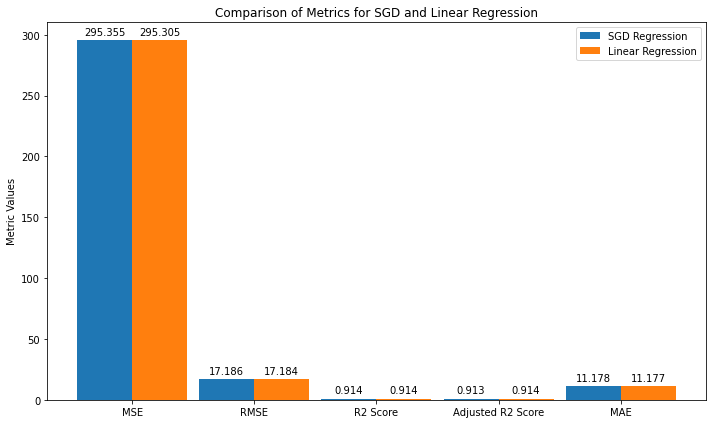

In [55]:
# Compare the metrics for Lasso and Ridge Regression using a plot
metrics = ["MSE", "RMSE", "R2 Score", "Adjusted R2 Score", "MAE"]

# Round off everything to two decimal places in the lists
sgd_values = [round(i, 3) for i in sgd_metrics]
linearreg_values = [round(i, 3) for i in linear_metrics]


# Width of the bars
width = 0.45  
x = np.arange(len(metrics)) 
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, ridge_values, width, label='SGD Regression')
rects2 = ax.bar(x + width/2, linearreg_values, width, label='Linear Regression')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Metrics for SGD and Linear Regression')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to add the metric values on top of the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()

plt.show()